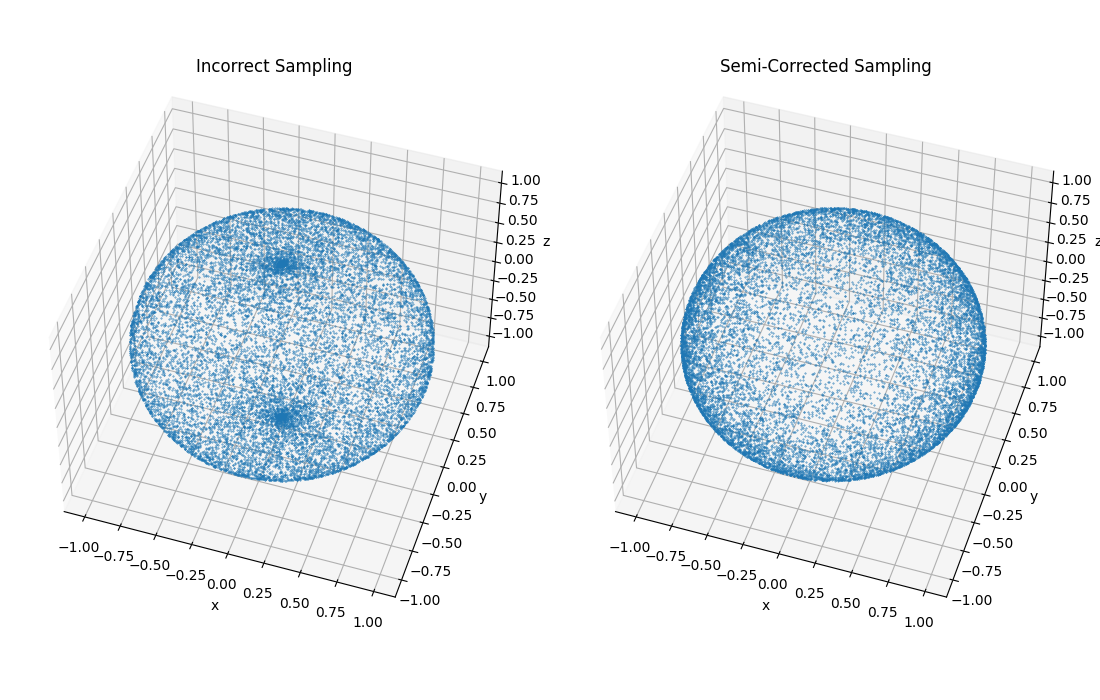

In [2]:
"""surface_sampling_sphere.ipynb"""
# Cell 1: Plot incorrect and semi-correct (my solution) random sampling for points on the surface of a unit sphere.

# Modified original code written by @dbiersach:
# https://github.com/dbiersach/qis101/blob/0aa4537a02ac7f71d62ce6bbaf54e1e3175a5d51/labs/Session%2020%20-%20Monte%20Carlo%20Methods/surface_sampling_sphere.ipynb
# Used ideas about the concept from this video: https://www.youtube.com/watch?v=Ooo30_5GJFA

from __future__ import annotations

import typing

import matplotlib.pyplot as plt
import numpy as np
import numpy.random as random
from matplotlib.markers import MarkerStyle

if typing.TYPE_CHECKING:
    from matplotlib.axes import Axes
    from numpy.typing import NDArray

%matplotlib widget


def plot_incorrect(ax: Axes) -> None:
    """Plot incorrectly sampled spherical surface with more points concentrated at poles"""
    num_samples = 15000  # Use 15_000 points

    u: NDArray[np.float_] = random.rand(num_samples) * np.pi  # poloidal angle
    v: NDArray[np.float_] = random.rand(num_samples) * 2 * np.pi  # toroidal angle

    # Convert spherical coords to Cartesian coords
    x: NDArray[np.float_] = np.array(np.sin(u) * np.sin(v), dtype=np.float_)
    y: NDArray[np.float_] = np.array(np.sin(u) * np.cos(v), dtype=np.float_)
    z: NDArray[np.float_] = np.cos(u)

    ax.set_title("Incorrect Sampling")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")  # type: ignore

    ax.view_init(azim=-72, elev=48)  # type: ignore

    pixel_size: float = (72 / ax.figure.dpi) ** 2  # type: ignore
    # Plot the incorrect sampling
    ax.scatter(x, y, z, marker=MarkerStyle("."), s=pixel_size, depthshade=False)  # type: ignore


def plot_semi_correct(ax: Axes) -> None:
    """Plot a semi-correctly sampled spherical surface (my solution)"""
    num_samples = 15_000 # Use 15_000 random points

    """
    Create random sampling by treating the upper and lower halves of the sphere as separate
    circle sampling problems, where radius = pi/2.  As if sampling two 2D circular areas,
    take the square root of a random number between 0 and 1 and multiply it by pi/2 to find 
    the component of the toroidal angle for both the upper and lower portions of the sphere.
    Subtract the component for the lower portion from pi/2 to reflect that the bottom half
    of the sphere is the inverted version of the top half.  Add the two components together
    to get the total toroidal angle.  Using this method, the toroidal angle is more likely 
    to be near the equator of the sphere where there is more surface area to be covered by
    points.
    """
    # poloidal angle
    u: NDArray[np.float_] = np.sqrt(
        random.rand(num_samples)) * np.pi / 2 + (np.pi / 2 - np.sqrt(random.rand(num_samples)) * np.pi / 2
    ) 
    v: NDArray[np.float_] = random.rand(num_samples) * 2 * np.pi  # toroidal angle

    # Convert spherical coordinates to Cartesian coordinates
    x: NDArray[np.float_] = np.array(np.sin(u) * np.sin(v), dtype=np.float_)
    y: NDArray[np.float_] = np.array(np.sin(u) * np.cos(v), dtype=np.float_)
    z = np.cos(u)

    ax.set_title("Semi-Corrected Sampling")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")  # type: ignore

    ax.view_init(azim=-72, elev=48)  # type: ignore

    pixel_size: float = (72 / ax.figure.dpi) ** 2  # type: ignore
    # Plot the semi-corrected sampling
    ax.scatter(x, y, z, marker=MarkerStyle("."), s=pixel_size, depthshade=False)  # type: ignore


def main() -> None:
    plt.close("all")
    plt.figure(" ", figsize=((11, 7)), constrained_layout=True)
    plot_incorrect(plt.subplot(121, projection="3d"))
    plot_semi_correct(plt.subplot(122, projection="3d"))
    plt.show()


main()

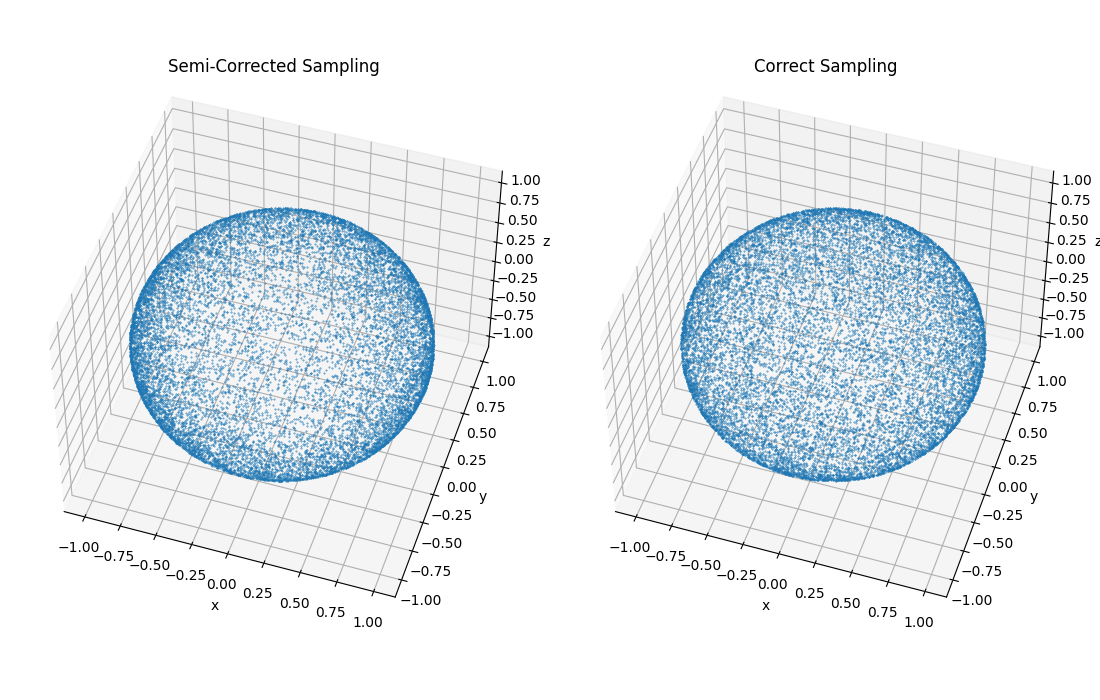

In [3]:
# Cell 2: Plot fully corrected sampling using method from @dbiersach (see https://apps.dtic.mil/sti/pdfs/ADA626479.pdf)


def plot_correct(ax: Axes) -> None:
    """Plot a correctly/uniformly sampled spherical surface"""
    num_samples = 15_000  # Use 15_000 random points

    # poloidal angle
    u: NDArray[np.float_] = np.arccos(2 * random.rand(num_samples) - 1)
    v: NDArray[np.float_] = random.rand(num_samples) * 2 * np.pi  # toroidal angle

    # Convert spherical coordinates to Cartesian coordinates
    x: NDArray[np.float_] = np.array(np.sin(u) * np.sin(v), dtype=np.float_)
    y: NDArray[np.float_] = np.array(np.sin(u) * np.cos(v), dtype=np.float_)
    z = np.cos(u)

    ax.set_title("Correct Sampling")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")  # type: ignore

    ax.view_init(azim=-72, elev=48)  # type: ignore

    pixel_size: float = (72 / ax.figure.dpi) ** 2  # type: ignore
    # Plot the corrected sampling
    ax.scatter(x, y, z, marker=MarkerStyle("."), s=pixel_size, depthshade=False)  # type: ignore


def main() -> None:
    plt.close("all")
    plt.figure(" ", figsize=((11, 7)), constrained_layout=True)
    plot_semi_correct(plt.subplot(121, projection="3d"))
    plot_correct(plt.subplot(122, projection="3d"))
    plt.show()


main()
